# Analyzing Seattle House Market For The Riches:

Importing Stuff:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.options.display.float_format = "{:.2f}".format

%matplotlib inline

Reading in File:

In [2]:
king = pd.read_csv("King_County_House_prices_dataset.csv")
#checking highest prices (45 Houses over 3 Million):
king.query('price > 3000000').sort_values("price", ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014 7700000.00         6       8.00        12050   
3910   9808700762   6/11/2014 7060000.00         5       4.50        10040   
9245   9208900037   9/19/2014 6890000.00         6       7.75         9890   
4407   2470100110    8/4/2014 5570000.00         5       5.75         9200   
1446   8907500070   4/13/2015 5350000.00         5       5.00         8000   
1313   7558700030   4/13/2015 5300000.00         6       6.00         7390   
1162   1247600105  10/20/2014 5110000.00         5       5.25         8010   
8085   1924059029   6/17/2014 4670000.00         5       6.75         9640   
2624   7738500731   8/15/2014 4500000.00         5       5.50         6640   
8629   3835500195   6/18/2014 4490000.00         4       3.00         6430   
12358  6065300370    5/6/2015 4210000.00         5       6.00         7440   
4145   6447300265  10/14/2014 4000000.00         4       5.50         7080   
2083   8106100105  11/14/2014 3850000.00         4       4.25         5770   
19002  2303900100   9/11/2014 3800000.00         3       4.25         5510   
7028    853200010    7/1/2014 3800000.00         5       5.50         7050   
16288  7397300170   5/30/2014 3710000.00         4       3.50         5550   
6502   4217402115   4/21/2015 3650000.00         6       4.75         5480   
18467  4389201095   5/11/2015 3650000.00         5       3.75         5020   
19133  3625049042  10/11/2014 3640000.00         5       6.00         5490   
15241  2425049063   9/11/2014 3640000.00         4       3.25         4830   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600    2.50        0.00  3.00  ...     13        8570   
3910      37325    2.00        1.00  2.00  ...     11        7680   
9245      31374    2.00        0.00  4.00  ...     13        8860   
4407      35069    2.00        0.00  0.00  ...     13        6200   
1446      23985    2.00        0.00  4.00  ...     12        6720   
1313      24829    2.00        1.00   nan  ...     12        5000   
1162      45517    2.00        1.00  4.00  ...     12        5990   
8085      13068    1.00        1.00  4.00  ...     12        4820   
2624      40014    2.00        1.00  4.00  ...     12        6350   
8629      27517    2.00        0.00  0.00  ...     12        6430   
12358     21540    2.00        0.00  0.00  ...     12        5550   
4145      16573    2.00        0.00  0.00  ...     12        5760   
2083      21300    2.00        1.00  4.00  ...     11        5770   
19002     35000    2.00        0.00  4.00  ...     13        4910   
7028      42840    1.00        0.00  2.00  ...     13        4320   
16288     28078    2.00        0.00  2.00  ...     12        3350   
6502      19401    1.50        1.00  4.00  ...     11        3910   
18467      8694    2.00        0.00  1.00  ...     12        3970   
19133     19897    2.00        0.00  0.00  ...     12        5490   
15241     22257    2.00        1.00  4.00  ...     11        4830   

       sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
7245          3480.0     1910       1987.00    98102 47.63 -122.32   
3910          2360.0     1940       2001.00    98004 47.65 -122.21   
9245          1030.0     2001          0.00    98039 47.63 -122.24   
4407          3000.0     2001           nan    98039 47.63 -122.23   
1446          1280.0     2009          0.00    98004 47.62 -122.22   
1313          2390.0     1991          0.00    98040 47.56 -122.21   
1162          2020.0     1999          0.00    98033 47.68 -122.21   
8085          4820.0     1983       2009.00    98040 47.56 -122.21   
2624           290.0     2004          0.00    98155 47.75 -122.28   
8629             0.0     2001          0.00    98004 47.62 -122.22   
12358         1890.0     2003          0.00    98006 47.57 -122.19   
4145          1320.0     2008          0.00    98039 47.62 -122.22   
2083            

Cleaning up the Data, creating some new columns:

In [3]:
# i just drop the 33 bedroom house
king_n = king.drop([15856])

#create price/sqft column and age column
king_n.eval('price_sqft = price / sqft_living', inplace = True)
king_n.eval('age = 2016 - yr_built', inplace = True)

#reformatting "sqft_basement"
king_n.sqft_basement = pd.to_numeric(king_n.sqft_basement, errors='coerce')

#Make Dummies out of sqft basement, waterfront & renovated:
# assign all values > 0 to 1 for renovation & sqft_basement:
b= king_n['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
r= king_n['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# get dummies for water & add to king_n
water_dum = pd.get_dummies(king_n['waterfront'], prefix='water', drop_first=True)
king_n = pd.concat([king_n, water_dum], axis=1)

# get dummies for basement & add to king_n
b.rename('base_dum', inplace = True)
king_n = pd.concat([king_n, b], axis=1)

# get dummies for renovation & add to king_n
r.rename('reno_dum', inplace = True)
king_n = pd.concat([king_n, r], axis=1)

king_n.rename(columns = {'water_1.0': 'water_dum'}, inplace=True)

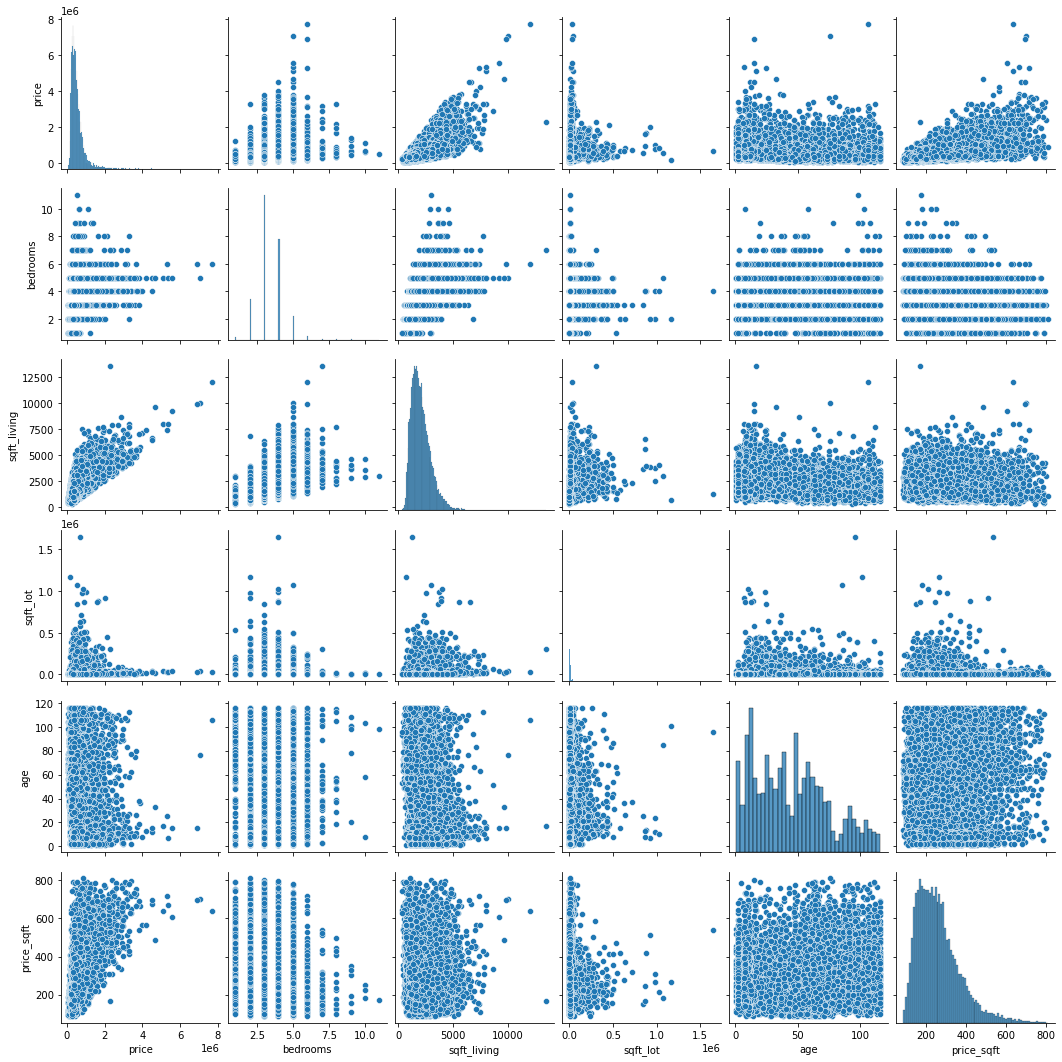

In [4]:
# pick some interesting variables and check for correlation:
X1 = king_n[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'age', 'price_sqft']]
sns.pairplot(X1);

# Some assumptions regarding my customer:
The most luxurious houses have 4-6 bedrooms, more bedrooms and the price decreases again:

    -> livingspace (big kitchen, livingroom, other features) is consumed by bedrooms!
    -> open floor concept is the way to go for luxurious & big houses
    
Livingspace in generall has the biggest effect on housing prices, combined with location:

    -> lotsize has opposing effects, depending on the location being close to city center or outskirts
    -> the overall biggest lots have low prices, the overall most expensive houses have small lots
    
Historic Buildings (>50Years for USA, no general rule) are rare on the West Coast:

    -> The most historic listed buildings in Seattle are low priced & centrally located

# Now let's plot some data under my customers searching criteria:

1st: Generall overview:

Where are the most expensive neighbourhoods?
Where do we have enough bathrooms for the servants?

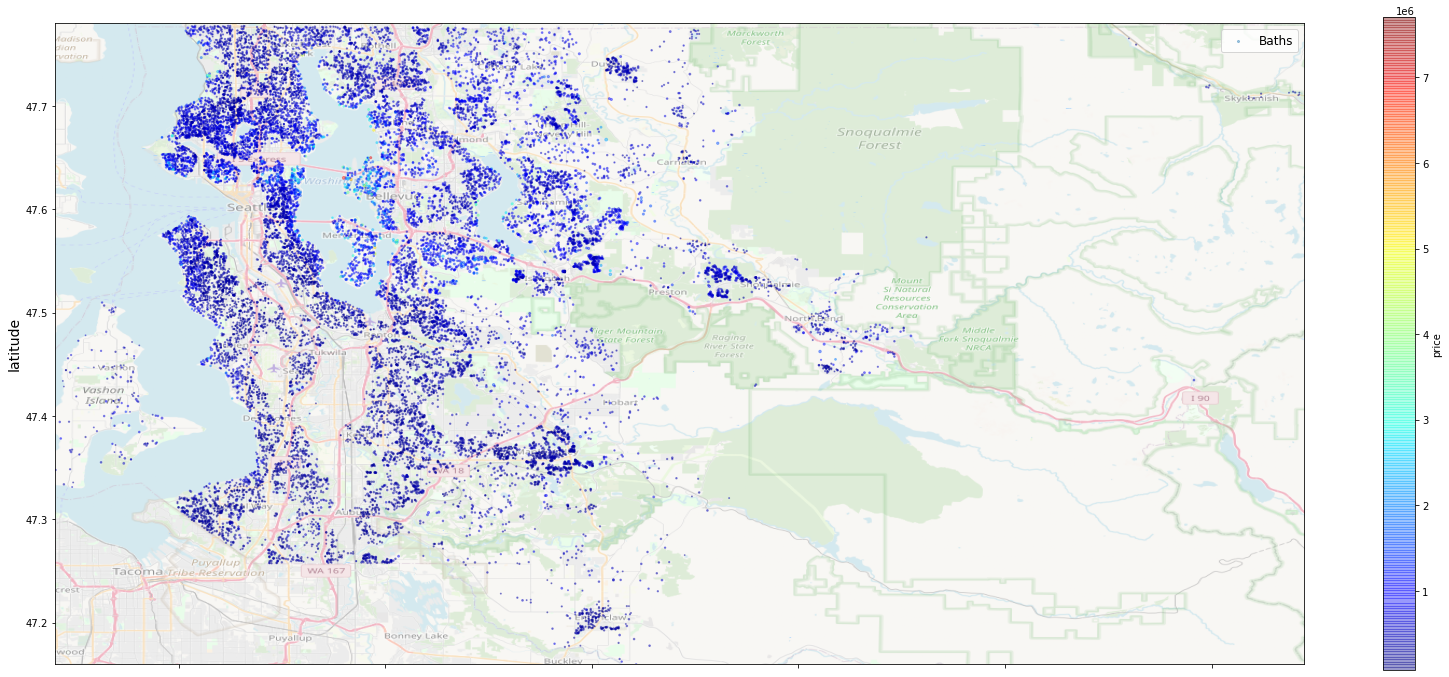

In [5]:
seattle_map=mpimg.imread('seattle_map.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,12), 
    s=king_n['bathrooms'], label="Baths",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4
    )

plt.imshow(seattle_map, extent=[-122.52, -121.31, 47.16, 47.78], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

Closer look at interesting high priced areas & reformatting Bathroom plots for better visualzation:

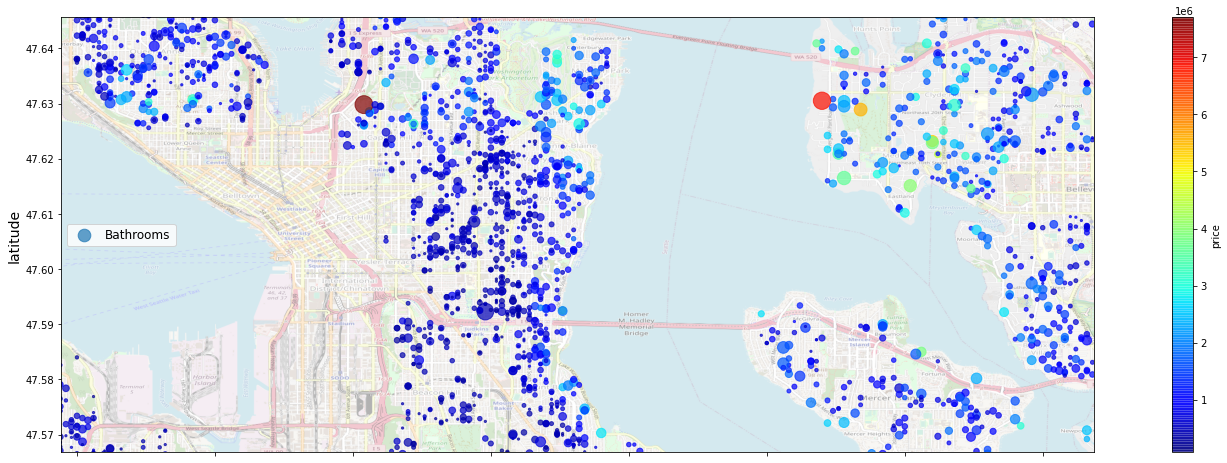

In [6]:
seattle_map=mpimg.imread('seattle_map2.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[5*n**2 for n in king_n['bathrooms']], label="Bathrooms",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

This map shows the most expensive buildings. 
The count of bathrooms is shown by the size of the circle.
The price is shown in the scale to your right.

# Now we plot age & lotsize on our area selectioned for optimal location choice:

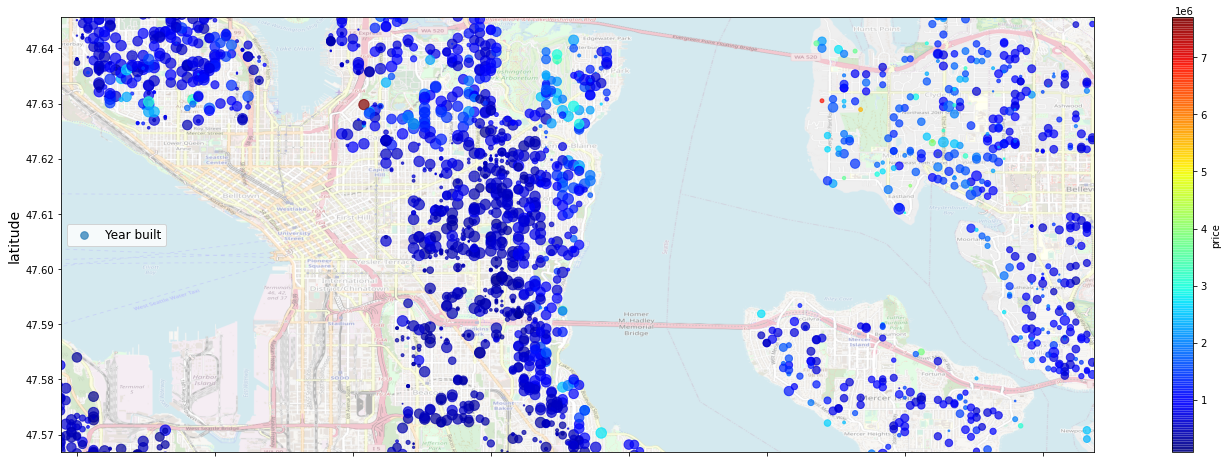

In [7]:
seattle_map=mpimg.imread('seattle_map2.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[n for n in king_n['age']], label="Year built",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

Most historic buildings are located centrally and therefore have smaller lotsizes. 
Now I check for all restrictions given to me by the buyer

# Checking for Houses built before 1970, with more than 4 Bathrooms, lot > 8.000 sqft & over 1 Million Dollar
    * tennis court is 2900 sqft 
    * pool is varying in size
    * budget is unlimited
    * historic houses are at least 50Y old 
    * close to golf

In [8]:
king_q = king_n.query('price > 1000000 and bathrooms >4 and age > 50 and sqft_lot > 8000')
king_q.sort_values(['sqft_living'])

id        date      price  bedrooms  bathrooms  sqft_living  \
4312   7639900025   6/28/2014 1080000.00         4       4.25         3500   
15539  1732801150    7/1/2014 2300000.00         4       4.75         3970   
18314  5317100750   7/11/2014 2920000.00         4       4.75         4575   
1359   1925069082   5/11/2015 2200000.00         5       4.25         4640   
9405   5700003630   6/30/2014 1930000.00         5       4.25         4830   
15578  5093300280    7/9/2014 1680000.00         5       5.25         4830   
779    1954700695   6/12/2014 2250000.00         5       4.25         4860   
2038   9471200200   3/25/2015 2530000.00         4       4.25         5040   
3381   1118001408  11/24/2014 2540000.00         5       4.75         5410   
6502   4217402115   4/21/2015 3650000.00         6       4.75         5480   
15035  8924600020  11/14/2014 1540000.00         4       4.50         5770   
7184   7159200005    5/7/2014 3200000.00         7       4.50         6210   
5697   1118002000   6/24/2014 2470000.00         5       4.75         6390   
5961   5249800010   12/3/2014 2730000.00         4       4.25         6410   
3018   3377900195   9/29/2014 2530000.00         4       5.50         6930   
7900   1068000375   9/23/2014 3200000.00         6       5.00         7100   
14542  2303900035   6/11/2014 2890000.00         5       6.25         8670   
3910   9808700762   6/11/2014 7060000.00         5       4.50        10040   
7245   6762700020  10/13/2014 7700000.00         6       8.00        12050   

       sqft_lot  floors  waterfront  view  ...  zipcode   lat    long  \
4312       8750    1.00        0.00  4.00  ...    98177 47.72 -122.37   
15539      9778    2.00        0.00  2.00  ...    98119 47.63 -122.37   
18314     24085    2.50        0.00  2.00  ...    98112 47.63 -122.28   
1359      22703    2.00        1.00  4.00  ...    98052 47.64 -122.10   
9405       8050    2.50         nan   nan  ...    98144 47.58 -122.29   
15578     18707    2.00        0.00  1.00  ...    98040 47.59 -122.25   
779        9453    1.50        0.00  1.00  ...    98112 47.62 -122.29   
2038      16048    1.00        0.00  3.00  ...    98105 47.67 -122.26   
3381      13431    2.00        0.00  0.00  ...    98112 47.63 -122.29   
6502      19401    1.50        1.00  4.00  ...    98105 47.65 -122.28   
15035     10050    1.00        0.00  3.00  ...    98115 47.68 -122.28   
7184       8856    2.50        0.00  2.00  ...    98109 47.63 -122.35   
5697      13180    2.00        0.00  0.00  ...    98112 47.63 -122.29   
5961      43838    2.50        0.00  2.00  ...    98144 47.57 -122.28   
3018      45100    1.00        0.00  0.00  ...    98006 47.55 -122.14   
7900      18200    2.50        0.00  0.00  ...    98199 47.64 -122.41   
14542     64033    2.00        0.00  4.00  ...    98177 47.73 -122.37   
3910      37325    2.00        1.00  2.00  ...    98004 47.65 -122.21   
7245      27600    2.50        0.00  3.00  ...    98102 47.63 -122.32   

       sqft_living15  sqft_lot15  price_sqft  age  water_dum  base_dum  \
4312            3110        8750      308.57   65          0         1   
15539           3970        8460      579.35   88          0         1   
18314           3900        9687      638.25   90          0         1   
1359            3140       14200      474.14   64          1         1   
9405            4470        9194      399.59  102          0         1   
15578           2880       10520      347.83   64          0         1   
779             3150        8557      462.96  111          0         1   
2038            3960       14000      501.98   66          0         1   
3381            3750       11596      469.50   75          0         1   
6502            3510       15810      666.06   80          1         1   
15035           2950        6700      266.90   67          0         1   
7184            2940        5400      515.30  106          0         1   
5697            4010        813

Only 19 Houses sold in the past meet our restrictions, only 10 for our choice of location.
I'd recoomend to look for newer, historizing houses so we can meet als other restrictions:

In [9]:
king_q = king_n.query('price > 1000000 and bathrooms >4 and sqft_lot > 8000')
king_q.shape

(150, 26)

Now it's 150 properties

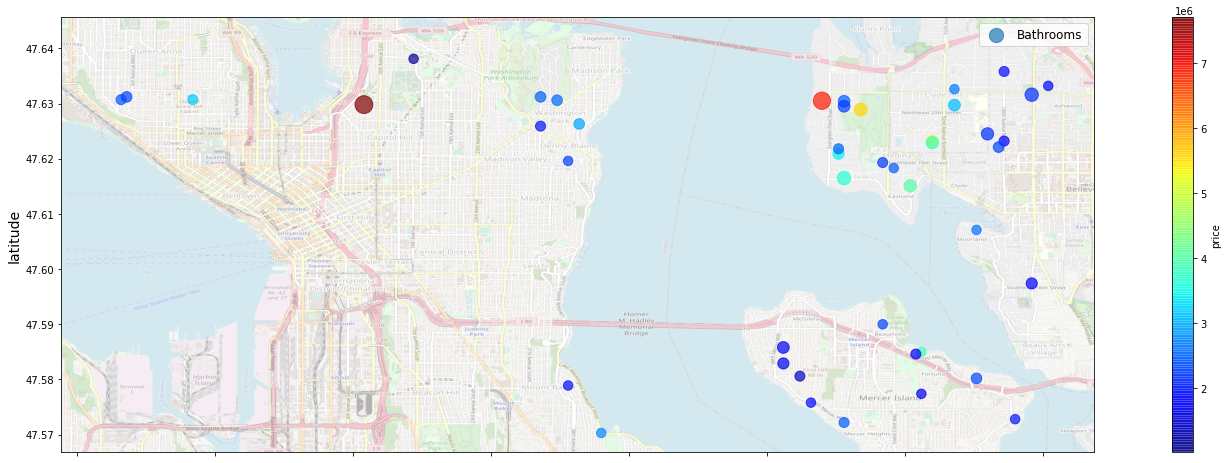

In [10]:
seattle_map=mpimg.imread('seattle_map2.png')
ax = king_q.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[[5*n**2 for n in king_q['bathrooms']]], label="Bathrooms",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_q['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

Final recommendation:
I would recommend the Medina Neighbourhood:

    * moste expensive neighbourhood - you got Jeff Bezos or the Gates' family as neighbours
    * with your private helicopter & jet you can reach the silicon valley in only 1.5 hours!
    * 3 driving ranges in a 15 min driving range (Golf)
    * lots of properties with more than 4 Bathrooms 
    * sufficient lotsizes for tennis court & pool 
    * no people drowning because water is to cold to swim

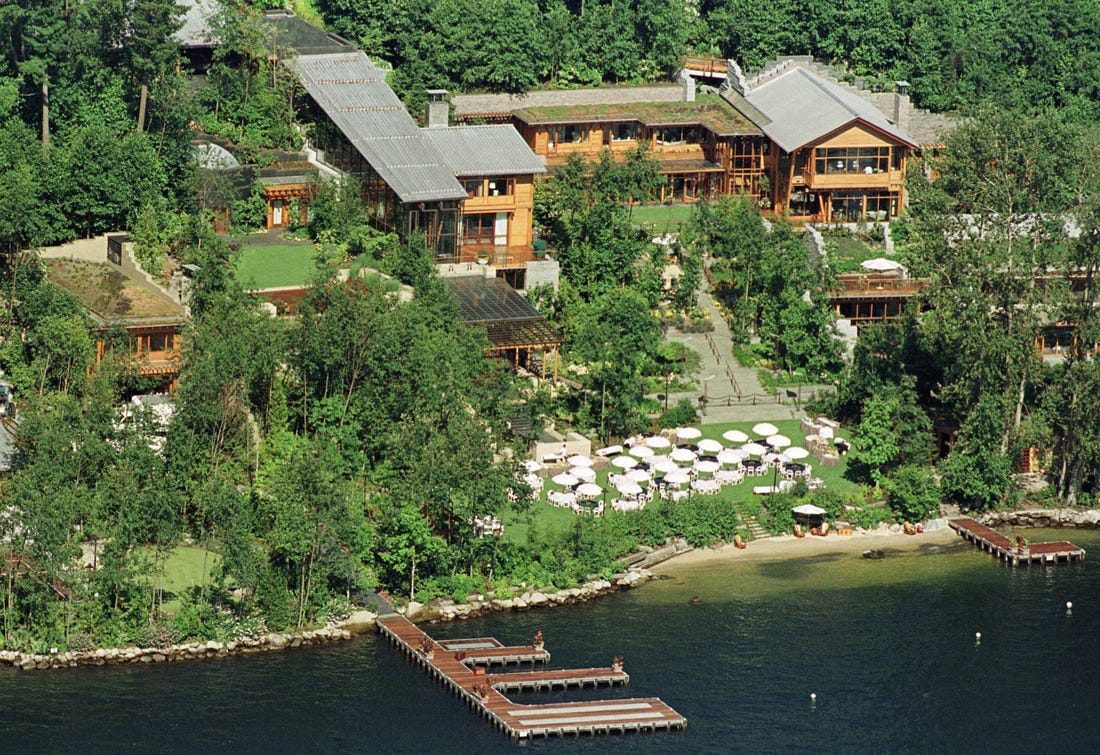

# Split Data, train model & calculate RMSE:
---

In [11]:
# adding all necessary Variables to satisfy our customers wishes and some more under Gauss - Markov Assumptions
X = king_n[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'age', 'base_dum', 'reno_dum', 'water_dum']]
X = sms.add_constant(X)
y = king_n.price

In [12]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()
# this shows waterfront properties are significantly more expensive, on average ~ 81.3k $

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3935.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:17:17   Log-Likelihood:            -2.9617e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21585   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.895e+05   1.58e+04    -62.561      0.000   -1.02e+06   -9.58e+05
bedrooms    -4.557e+04   2134.585    -21.351      0.000   -4.98e+04   -4.14e+04
bathrooms    4.986e+04   3560.794     14.003      0.000    4.29e+04    5.68e+04
sqft_living   178.3740      3.344     53.338      0.000     171.819     184.929
sqft_lot       -0.2362      0.037     -6.393      0.000      -0.309      -0.164
floors       2.141e+04   3629.703      5.898      0.000    1.43e+04    2.85e+04
grade        1.295e+05   2160.624     59.921      0.000    1.25e+05    1.34e+05
age          3915.5296     67.319     58.164      0.000    3783.579    4047.480
base_dum     1.327e+04   3462.192      3.833      0.000    6484.008    2.01e+04
reno_dum     1.824e+04   8508.574      2.143      0.032    1557.593    3.49e+04
water_dum    7.507e+05   1.84e+04     40.820      0.000    7.15e+05    7.87e+05
==============================================================================
Omnibus:                    15746.036   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           989646.346
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      35.649   Cond. No.                     5.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# After we are satisfied with our model, we export Data to CSV File:

In [13]:
king_n.to_csv('king_county_workfile.csv')

In [14]:
# We assign the features our model will be tested & trained on:
X = king_n[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'age', 
        'base_dum', 'reno_dum', 'water_dum']]
Y = king_n['price']

# split data into 90%training and 10% testing data:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.1, random_state=42)

X_train.info()
# check training Data again for outliers, missing values 
# The features in our modell are already dealt with by converting them to dummies and setting their default value to zero
# the positive effect of waterfront properties, a basement or a renovation will be flattened:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19436 entries, 13820 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     19436 non-null  int64  
 1   bathrooms    19436 non-null  float64
 2   sqft_living  19436 non-null  int64  
 3   sqft_lot     19436 non-null  int64  
 4   floors       19436 non-null  float64
 5   grade        19436 non-null  int64  
 6   age          19436 non-null  int64  
 7   base_dum     19436 non-null  int64  
 8   reno_dum     19436 non-null  int64  
 9   water_dum    19436 non-null  uint8  
dtypes: float64(2), int64(7), uint8(1)
memory usage: 1.5 MB


In [15]:
# Adding the constants
X_train = sms.add_constant(X_train)
X_test = sms.add_constant(X_test) 

# Training the model
print("-----  Training the model ----")
model = sms.OLS(y_train, X_train).fit()
print_model = model.summary()


# Predictions to check the model
print("-----  Evaluating the model ----")
predictions = model.predict(X_train)
err_train = np.sqrt(mean_squared_error(y_train, predictions))
predictions_test = model.predict(X_test)
err_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(print_model)
print ("-------------")
print (f"RMSE on train data: {err_train}")
print (f"RMSE on test data: {err_test}")

-----  Training the model ----
-----  Evaluating the model ----
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3563.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:17:17   Log-Likelihood:            -2.6668e+05
No. Observations:               19436   AIC:                         5.334e+05
Df Residuals:                   19425   BIC:                         5.335e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

# Predicting house prices for customers wishes:

In [16]:
# What would a house cost, that satisfies our customer totally?
# 6 Bedrooms, 5 Bathrooms, 4000sqft living space, 8000 sqft lot (tennis court is 2900sqft), 
# 2 floors, Grade at least 8, age 70+ Years, Basement, No Reno, No Waterside, But Golf
model.predict([1, 6, 5, 4000, 8000, 2, 8, 80, 1, 0, 0])

array([1105752.11024813])

In [17]:
# Going Crazy with a bigger house and all features:
model.predict([1, 10, 9, 8000, 16000, 2, 13, 80, 1, 1, 1])

array([3267131.6159233])